# Spring 2024 Final Project

# Team Members:

## PN45610 - SAI CHAITANYA VARMA INDUKURI

## PC60253 - HEMANTH GORAPALLI

# Introduction:

Actually the aim of the project is to findout themodel which it doesnt have any target value and we dont know what feature has to be enabled to do the testing and we know the question and we dont know the answer and we are gonna figure it out with these methods.

In [1]:
import pandas as pd

class SME():

    def __init__(self):
        self.asked = 0
        self.df = self.get()

    def get(self):
        X_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final3/X_train.csv')
        y_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final3/y_train.csv')

        X_train['Left'] = y_train
        return X_train

    def ask(self, gender, distance, years_worked, hire_date, prev_salary, current_salary, dep_code):
        self.asked += 1
        #  print(self.asked)

        if self.asked > 500:
            raise Exception("Sorry, you have asked enough")

        result = self.df.query(f"Gender=={gender} and Distance=='{distance}' and YearsWorked == {years_worked} and HireDate == '{hire_date}' and PreviousSalary == '{prev_salary}' and Salary == '{current_salary}' and DepartmentCode == {dep_code}")


Here first we are going to find the y_train without using the supervised learning and we are trying to implement unsupervised machine learning model with that wea re going to find y_train to tackle the realtime world. 

In [2]:
sme = SME()

In [3]:
# e.g.
sme.ask(0, '~20miles', 8, '2007-09-05',  '63K', '66K', 3)

In [4]:
sme = sme.get()

In [5]:
X_train = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final3/X_train.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final3/X_test.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/final3/y_test.csv')

In [6]:
X_train.head()

,Gender,Distance,YearsWorked,HireDate,PreviousSalary,Salary,DepartmentCode
0,0,~20miles,8,2007-09-05,63K,66K,3
1,0,>30miles,7,2011-10-16,60K,63K,3
2,0,~15miles,7,2011-05-18,59K,60K,3
3,1,<5mile,3,2000-06-30,60K,61K,2
4,1,~10miles,9,2010-04-28,56K,57K,7


In this data I have observed that Distance, PreviousSalary and Salary were
not numerical and we are performing data cleaning

# Data Cleaning

In [7]:
X_train.shape

(7500, 7)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          7500 non-null   int64 
 1   Distance        7490 non-null   object
 2   YearsWorked     7500 non-null   int64 
 3   HireDate        7500 non-null   object
 4   PreviousSalary  7500 non-null   object
 5   Salary          7500 non-null   object
 6   DepartmentCode  7500 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 410.3+ KB


In [9]:
X_train.isnull().sum()

Gender             0
Distance          10
YearsWorked        0
HireDate           0
PreviousSalary     0
Salary             0
DepartmentCode     0
dtype: int64

Here in the distance column we have 10 rows of null data and I would not like to remove the data of the 10 rows and I want to keep the data

* We need to fill the na values

* lets Fill the NA values witht he median data and then change the columns from object to integer.

In [10]:
# Fill missing values with median before converting to integer
median_distance_train = X_train['Distance'].str.extract('(\d+)').astype(float).median()
median_distance_test = X_test['Distance'].str.extract('(\d+)').astype(float).median()

X_train['Distance'] = X_train['Distance'].str.extract('(\d+)').fillna(median_distance_train).astype(int)
X_test['Distance'] = X_test['Distance'].str.extract('(\d+)').fillna(median_distance_test).astype(int)

# Display the modified DataFrame
print(X_train['Distance'].head())
print(X_test['Distance'].head())

0    20
1    30
2    15
3     5
4    10
Name: Distance, dtype: int32
0     5
1    15
2    20
3    30
4    10
Name: Distance, dtype: int32


In [11]:
# Convert "HireDate" column to datetime format
X_train['HireDate'] = pd.to_datetime(X_train['HireDate'], format='%Y-%m-%d')
X_test['HireDate'] = pd.to_datetime(X_test['HireDate'], format='%Y-%m-%d')

# Display the modified DataFrame
print(X_train['HireDate'].head())
print(X_test['HireDate'].head())


0   2007-09-05
1   2011-10-16
2   2011-05-18
3   2000-06-30
4   2010-04-28
Name: HireDate, dtype: datetime64[ns]
0   2011-07-19
1   2004-03-23
2   2000-09-19
3   2008-11-05
4   1999-01-16
Name: HireDate, dtype: datetime64[ns]


In [12]:
# Convert "PreviousSalary" and "Salary" columns to integer format
X_train['PreviousSalary'] = X_train['PreviousSalary'].str.replace('K', '').astype(int) * 1000
X_train['Salary'] = X_train['Salary'].str.replace('K', '').astype(int) * 1000

X_test['PreviousSalary'] = X_test['PreviousSalary'].str.replace('K', '').astype(int) * 1000
X_test['Salary'] = X_test['Salary'].str.replace('K', '').astype(int) * 1000

# Display the modified DataFrame
print(X_train[['PreviousSalary', 'Salary']].head())
print(X_test[['PreviousSalary', 'Salary']].head())


   PreviousSalary  Salary
0           63000   66000
1           60000   63000
2           59000   60000
3           60000   61000
4           56000   57000
   PreviousSalary  Salary
0           59000   61000
1           58000   60000
2           58000   60000
3           59000   61000
4           58000   59000


In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Gender          7500 non-null   int64         
 1   Distance        7500 non-null   int32         
 2   YearsWorked     7500 non-null   int64         
 3   HireDate        7500 non-null   datetime64[ns]
 4   PreviousSalary  7500 non-null   int32         
 5   Salary          7500 non-null   int32         
 6   DepartmentCode  7500 non-null   int64         
dtypes: datetime64[ns](1), int32(3), int64(3)
memory usage: 322.4 KB


In [14]:
X_train.describe()

,Gender,Distance,YearsWorked,HireDate,PreviousSalary,Salary,DepartmentCode
count,7500.000000,7500.000000,7500.000000,7500,7500.000000,7500.000000,7500.00000
mean,0.404133,15.074000,7.013067,2007-07-28 13:20:38.400000,59517.066667,61330.933333,3.99360
min,0.000000,5.000000,1.000000,1999-01-01 00:00:00,48000.000000,48000.000000,1.00000
25%,0.000000,10.000000,6.000000,2003-04-03 00:00:00,58000.000000,59000.000000,2.00000
50%,0.000000,15.000000,7.000000,2007-07-07 00:00:00,60000.000000,61000.000000,3.00000
75%,1.000000,20.000000,8.000000,2011-10-13 06:00:00,62000.000000,64000.000000,6.00000
max,1.000000,30.000000,14.000000,2020-08-05 00:00:00,69000.000000,72000.000000,7.00000
std,0.490756,6.730322,1.865840,NaN,3049.199088,3228.395804,2.15822


As you can see I have converted the datatypes to int and i have converted the hire date to date time format and to make sure that visualizations are represented properly

# EDA

With the help of this EDA we are gonna visualize the data and sho the relationship between variables

In [15]:
X_train.head()

,Gender,Distance,YearsWorked,HireDate,PreviousSalary,Salary,DepartmentCode
0,0,20,8,2007-09-05,63000,66000,3
1,0,30,7,2011-10-16,60000,63000,3
2,0,15,7,2011-05-18,59000,60000,3
3,1,5,3,2000-06-30,60000,61000,2
4,1,10,9,2010-04-28,56000,57000,7


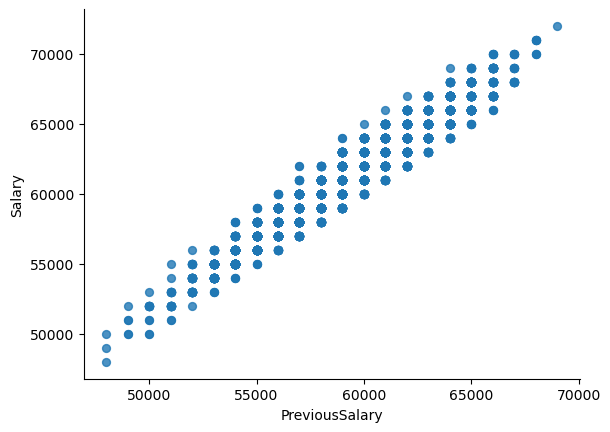

In [16]:
# Plot for Previous Salary vs Salary

from matplotlib import pyplot as plt
X_train.plot(kind='scatter', x='PreviousSalary', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Distribution Plots

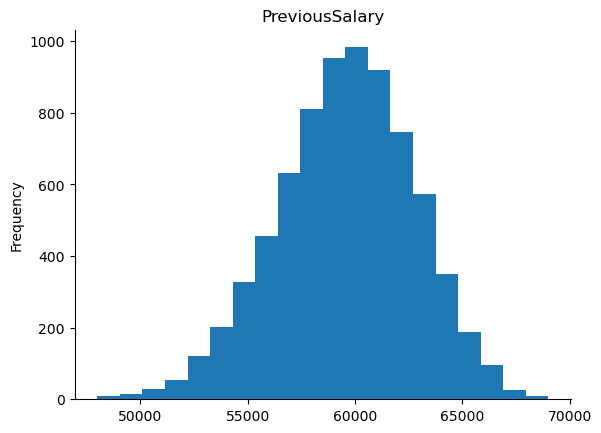

In [17]:
from matplotlib import pyplot as plt
X_train['PreviousSalary'].plot(kind='hist', bins=20, title='PreviousSalary')
plt.gca().spines[['top', 'right',]].set_visible(False)

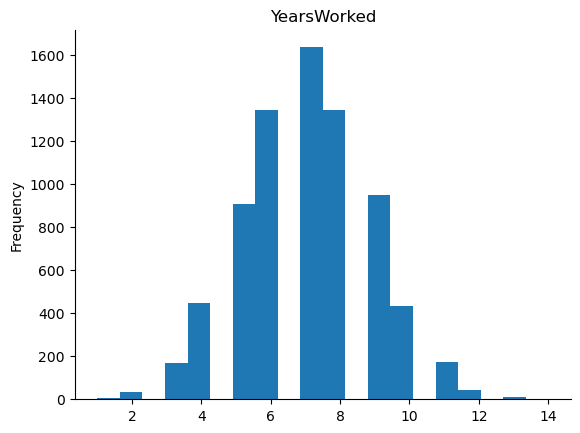

In [18]:
from matplotlib import pyplot as plt
X_train['YearsWorked'].plot(kind='hist', bins=20, title='YearsWorked')
plt.gca().spines[['top', 'right',]].set_visible(False)

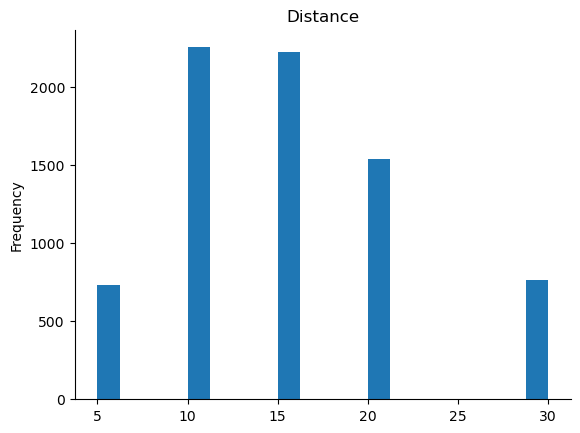

In [19]:
from matplotlib import pyplot as plt
X_train['Distance'].plot(kind='hist', bins=20, title='Distance')
plt.gca().spines[['top', 'right',]].set_visible(False)

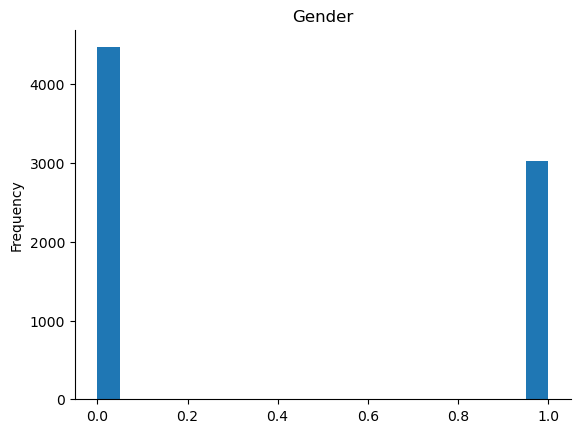

In [20]:
# @title Gender

from matplotlib import pyplot as plt
X_train['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Time series plots

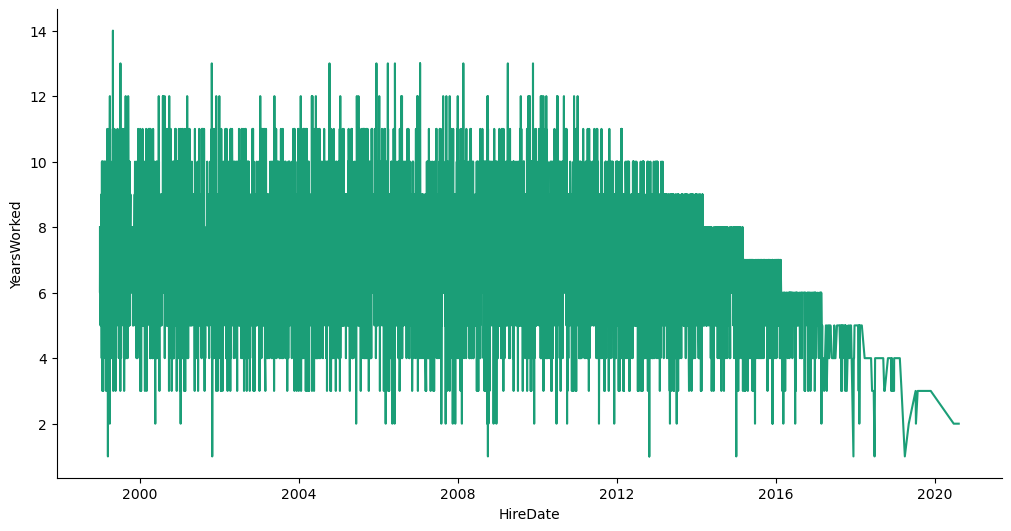

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['HireDate']
  ys = series['YearsWorked']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = X_train.sort_values('HireDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('HireDate')
_ = plt.ylabel('YearsWorked')

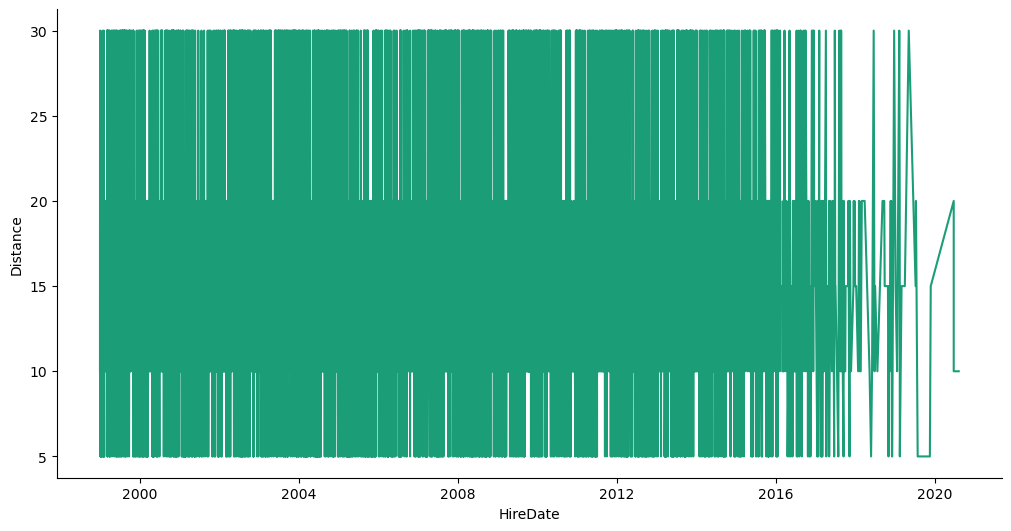

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['HireDate']
  ys = series['Distance']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = X_train.sort_values('HireDate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('HireDate')
_ = plt.ylabel('Distance')

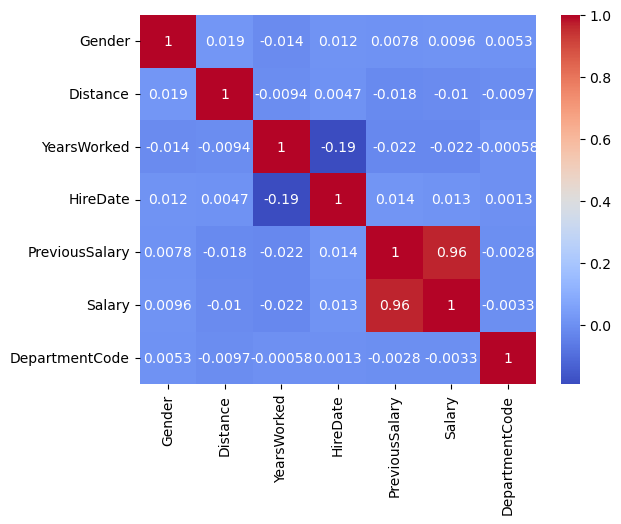

In [23]:
# prompt: heat map for feature selection

import matplotlib.pyplot as plt
import seaborn as sns

# Get the correlation matrix
correlation_matrix = X_train.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


As I can here I have observed the changes in the heatmap in which the factors are:

•  Gender and Distance: 0.019 (weak positive correlation) This suggests that as Gender increases (e.g., from female to male), Distance tends to increase slightly as well. 

•  Gender and YearsWorked: -0.014 (weak negative correlation) This indicates a slight inverse relationship, where higher values of Gender (e.g., males) tend to have slightly fewer YearsWorked. 

•  Distance and YearsWorked: -0.0094 (weak negative correlation) This suggests that as Distance increases, YearsWorked tends to decrease slightly. 

•  HireDate and PreviousSalary: 0.014 (weak positive correlation) A later HireDate is associated with a slightly higher PreviousSalary. 

•  PreviousSalary and Salary: 0.96 (very strong positive correlation) This is an expected result, as an individual's previous salary is typically a strong predictor of their current salary. 

•  Salary and DepartmentCode: 0.0033 (very weak positive correlation) This suggests there is almost no linear relationship between Salary and DepartmentCode.


In [24]:
X_train.head()

,Gender,Distance,YearsWorked,HireDate,PreviousSalary,Salary,DepartmentCode
0,0,20,8,2007-09-05,63000,66000,3
1,0,30,7,2011-10-16,60000,63000,3
2,0,15,7,2011-05-18,59000,60000,3
3,1,5,3,2000-06-30,60000,61000,2
4,1,10,9,2010-04-28,56000,57000,7


In [25]:
X_train

,Gender,Distance,YearsWorked,HireDate,PreviousSalary,Salary,DepartmentCode
0,0,20,8,2007-09-05,63000,66000,3
1,0,30,7,2011-10-16,60000,63000,3
2,0,15,7,2011-05-18,59000,60000,3
3,1,5,3,2000-06-30,60000,61000,2
4,1,10,9,2010-04-28,56000,57000,7
...,...,...,...,...,...,...,...
7495,0,30,5,2014-03-15,60000,62000,6
7496,0,10,7,2011-07-10,64000,68000,3
7497,0,10,8,2006-08-19,56000,57000,2
7498,0,20,6,2016-09-18,60000,62000,5


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Gender          7500 non-null   int64         
 1   Distance        7500 non-null   int32         
 2   YearsWorked     7500 non-null   int64         
 3   HireDate        7500 non-null   datetime64[ns]
 4   PreviousSalary  7500 non-null   int32         
 5   Salary          7500 non-null   int32         
 6   DepartmentCode  7500 non-null   int64         
dtypes: datetime64[ns](1), int32(3), int64(3)
memory usage: 322.4 KB


In [27]:
X_test

,Gender,Distance,YearsWorked,HireDate,PreviousSalary,Salary,DepartmentCode
0,1,5,6,2011-07-19,59000,61000,6
1,0,15,2,2004-03-23,58000,60000,2
2,0,20,8,2000-09-19,58000,60000,7
3,0,30,6,2008-11-05,59000,61000,6
4,1,10,6,1999-01-16,58000,59000,2
...,...,...,...,...,...,...,...
2495,0,30,9,2003-06-13,58000,59000,7
2496,1,15,5,2007-03-13,60000,62000,1
2497,0,20,5,2004-09-22,61000,63000,6
2498,1,10,7,2000-02-12,56000,58000,3


In [28]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Gender          2500 non-null   int64         
 1   Distance        2500 non-null   int32         
 2   YearsWorked     2500 non-null   int64         
 3   HireDate        2500 non-null   datetime64[ns]
 4   PreviousSalary  2500 non-null   int32         
 5   Salary          2500 non-null   int32         
 6   DepartmentCode  2500 non-null   int64         
dtypes: datetime64[ns](1), int32(3), int64(3)
memory usage: 107.6 KB


# Trail Test

In [29]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ['YearsWorked', 'PreviousSalary', 'Salary']
categorical_features = ['Gender', 'Distance', 'DepartmentCode']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessing_pipeline = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


X_train_processed = preprocessing_pipeline.fit_transform(X_train)
X_test_processed = preprocessing_pipeline.transform(X_test)


Here when we are doing k-means clustering we are going to calculate using two methods one method is silhoutte score and elbow plot as follows:

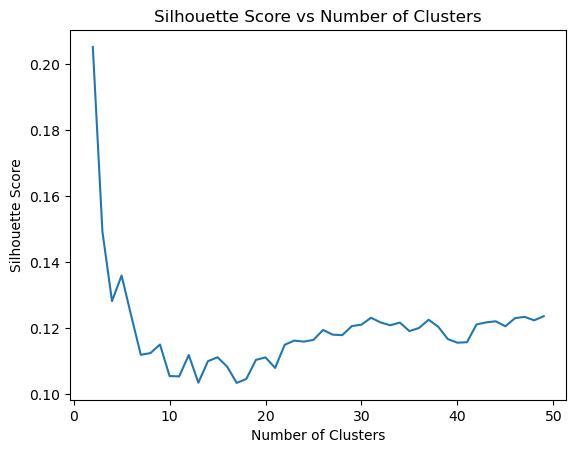

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


silhouette_scores = []

clusters_range = range(2, 50) 

# Perform KMeans clustering for each number of clusters
for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init='auto', random_state=42)
    kmeans.fit(X_train_processed)

    # Compute silhouette score
    silhouette_avg = silhouette_score(X_train_processed, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(clusters_range, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()


As you can see in the diagram:

Initial Peak: The graph shows a sharp peak in the Silhouette Score when the number of clusters is around 2-4. This indicates that the data points are clustered exceptionally well at this number of clusters suggesting that the optimal number of clusters for this dataset is likely within this range.

Subsequent Decline: After the initial peak the Silhouette Score declines and becomes more erratic as the number of clusters increases beyond the 2-4 range. This suggests that as the algorithm tries to divide the data into more clusters it struggles to find meaningful groupings and the quality of the clustering deteriorates. 

Fluctuations: As the number of clusters continues to increase the graph displays a fluctuating pattern with the Silhouette Score rising and falling. This indicates that there may be certain specific numbers of clusters where the data points cluster reasonably well but overall the clustering quality becomes less consistent as more clusters are added. 

Optimal Range Identification: The overall pattern of the graph with the initial peak followed by a decline and fluctuations suggests that the optimal number of clusters for this dataset is likely within the range of 2-4 clusters. Beyond this range the clustering algorithm struggles to find meaningful groupings and the quality of the clustering diminishes.


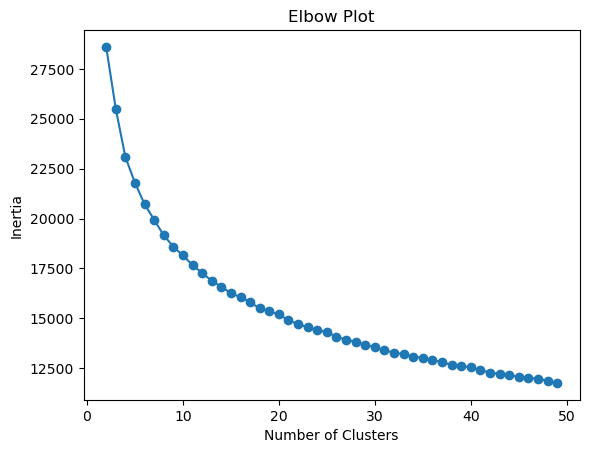

In [31]:
inertia_values = []

clusters_range = range(2, 50)

# Perform KMeans clustering for each number of clusters
for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(X_train_processed)

    # Store inertia value for elbow plot
    inertia_values.append(kmeans.inertia_)

# Visualize them using elbow plot
plt.plot(clusters_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

The elbow method is a technique used to determine the optimal number of clusters in a dataset. The method involves calculating the inertia for each possible number of clusters and then plotting the results on a graph. The elbow in the graph indicates the optimal number of clusters.

In this case, the elbow is located at k=4. This means that the optimal number of clusters in the dataset is 4.

* The inertia is a measure of how well the data is clustered. A lower inertia indicates better clustering.
* The elbow in the graph is the point at which the decrease in inertia starts to level off.
* The optimal number of clusters is the point at the elbow.

Another thing I have observed that while the number of clusters increases significantly the inertia value decreases.

Therefore, the optimal number of clusters in this dataset is 4.

In [32]:
from sklearn.cluster import KMeans

num_clusters = 35

kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')

kmeans.fit(X_train_processed)

X_train['ClusterLabel'] = kmeans.labels_

X_train.head()

,Gender,Distance,YearsWorked,HireDate,PreviousSalary,Salary,DepartmentCode,ClusterLabel
0,0,20,8,2007-09-05,63000,66000,3,29
1,0,30,7,2011-10-16,60000,63000,3,27
2,0,15,7,2011-05-18,59000,60000,3,28
3,1,5,3,2000-06-30,60000,61000,2,22
4,1,10,9,2010-04-28,56000,57000,7,33


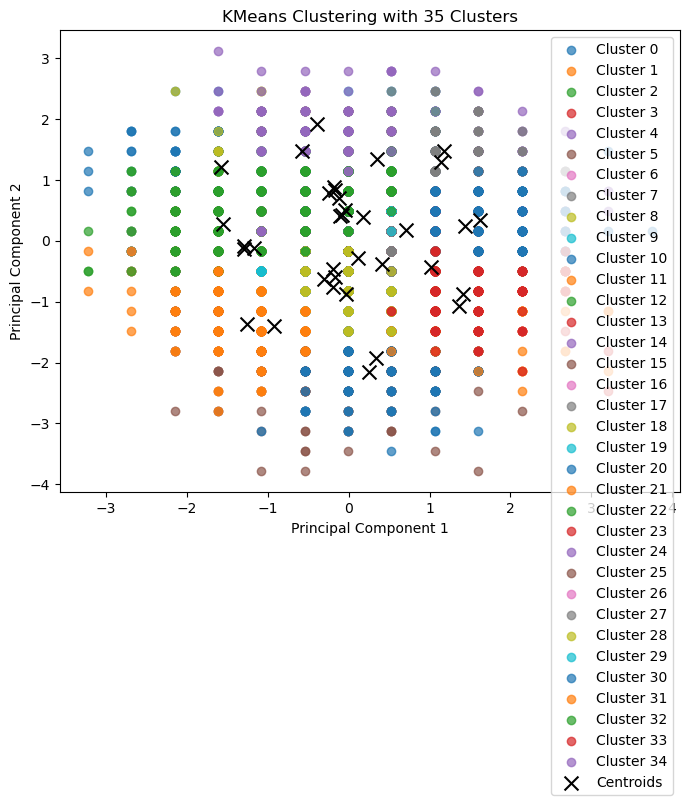

In [33]:
import matplotlib.pyplot as plt

# Extract PCA-transformed features
pca_features = X_train_processed[:, :2]  # Assuming you used 2 components in PCA


plt.figure(figsize=(8, 6))

# Visualize a scatter plot for clusters
for cluster_label in range(num_clusters):
    plt.scatter(pca_features[X_train['ClusterLabel'] == cluster_label, 0],
                pca_features[X_train['ClusterLabel'] == cluster_label, 1],
                label=f'Cluster {cluster_label}', alpha=0.7)

# Plot cluster centroids
centroids = kmeans.cluster_centers_[:, :2]
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=100, color='black', label='Centroids')

plt.title(f'KMeans Clustering with {num_clusters} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In this case I have implemented as an example of 35 clusters and visualized it and i have calculated the centroids
to show the nearest distance 

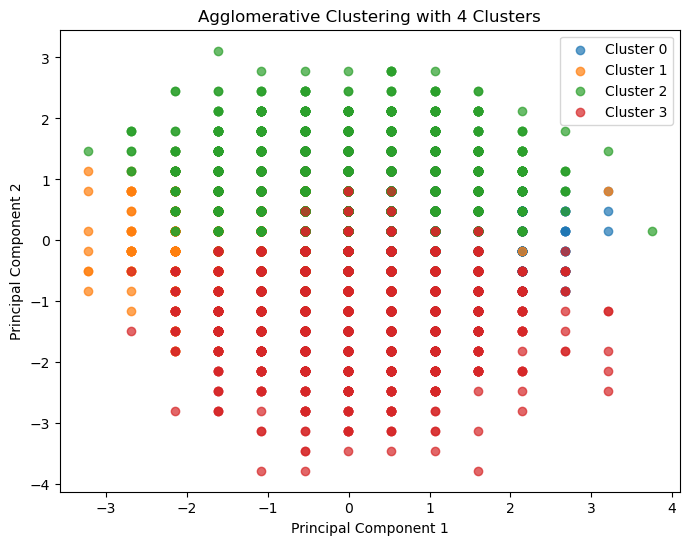

In [34]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Fit AgglomerativeClustering model
agglomerative = AgglomerativeClustering(n_clusters=4)
cluster_labels = agglomerative.fit_predict(X_train_processed)

# Extract PCA-transformed features
pca_features = X_train_processed[:, :2]  # Assuming you used 2 components in PCA

# Plot the clusters
plt.figure(figsize=(8, 6))

# Scatter plot for each cluster
for cluster_label in range(4):
    plt.scatter(pca_features[cluster_labels == cluster_label, 0],
                pca_features[cluster_labels == cluster_label, 1],
                label=f'Cluster {cluster_label}', alpha=0.7)

plt.title('Agglomerative Clustering with 4 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


Four distinct clusters: The data points are grouped into four distinct clusters, represented by different colors - blue (Cluster 0), orange (Cluster 1), green (Cluster 2), and red (Cluster 3).
    
The clusters are visually separated from each other along the Principal Component 1 axis, with some overlap between adjacent clusters.
    
The red cluster (Cluster 3) appears to be the largest followed by the green cluster (Cluster 2). The blue (Cluster 0) and orange (Cluster 1) clusters are relatively smaller.
    
The clusters exhibit different shapes and distributions. For example in this case the red cluster (Cluster 3) appears elongated, while the green cluster (Cluster 2) is more compact.
    
Potential outliers: There are a few data points (green) that seem to be isolated from the main clusters, potentially indicating outliers or noise in the data.

In [35]:
# Define the KMeans pipeline
kmeans_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessing_pipeline),
    ('kmeans', KMeans(n_clusters=4, n_init=10, random_state=42))  # Set the number of clusters and n_init
])

# Fit the KMeans pipeline to your data
kmeans_pipeline.fit(X_train)

X_train['cluster'] = kmeans_pipeline.predict(X_train)

In [36]:
# Access the cluster centroids
centroids = kmeans_pipeline.named_steps['kmeans'].cluster_centers_

# Print the centroids
print("Cluster Centroids:")
print(centroids)

Cluster Centroids:
[[ 0.02511657  1.17684534  1.19646235  0.60187598  0.39812402  0.09588327
   0.31474726  0.29390307  0.19958312  0.09588327  0.17352788  0.16988015
   0.17300677  0.14851485  0.17665451  0.15841584]
 [ 0.09128344 -1.38659639 -1.36145409  0.61357868  0.38642132  0.09771574
   0.3071066   0.28616751  0.19670051  0.11230964  0.17322335  0.16370558
   0.16751269  0.16497462  0.17956853  0.15101523]
 [ 0.79709758 -0.01891371 -0.03372198  0.5948856   0.4051144   0.10049349
   0.2974428   0.29654554  0.19964109  0.10587707  0.15657245  0.16689098
   0.16330193  0.1628533   0.18618214  0.16419919]
 [-1.10855399 -0.01741646 -0.04233858  0.57488739  0.42511261  0.09572072
   0.28153153  0.30574324  0.22297297  0.09403153  0.16948198  0.15653153
   0.1829955   0.1615991   0.15484234  0.17454955]]


In [37]:
X_distance = kmeans_pipeline.transform(X_train)
X_distance

array([[1.51666367, 4.05526306, 2.37024506, 2.86355382],
       [1.92095331, 2.84051757, 1.78212772, 1.94224978],
       [2.48919516, 2.04625762, 1.62045987, 1.77908003],
       ...,
       [3.72624691, 1.41686734, 2.20773287, 2.74834228],
       [2.09051596, 2.68879769, 1.97315743, 1.55341482],
       [3.49367879, 1.94944941, 2.67802873, 1.89925225]])

In [38]:
import numpy as np

representative_idx = np.argmin(X_distance, axis=0)
representative_idx

array([1343, 1416, 2649, 3144], dtype=int64)

In [39]:
#dataframe

In [40]:
X_train['left'] = None

cluster=0
for idx in representative_idx:
#     print(idx)
    print(X_train[idx:idx+1])
    left = input(f"Enter value for 'left' attribute for Cluster {cluster}: ")
    X_train['left'] = [ left if c == cluster else g  for c, g in zip(X_train['cluster'], X_train['left'])]
    cluster+=1
    print('----------------------')

X_train

      Gender  Distance  YearsWorked   HireDate  PreviousSalary  Salary  \
1343       0        10            7 2010-09-19           63000   65000   

      DepartmentCode  ClusterLabel  cluster  left  
1343               6            32        0  None  
Enter value for 'left' attribute for Cluster 0: 1
----------------------
      Gender  Distance  YearsWorked   HireDate  PreviousSalary  Salary  \
1416       0        10            7 2015-03-04           55000   57000   

      DepartmentCode  ClusterLabel  cluster  left  
1416               6            12        1  None  
Enter value for 'left' attribute for Cluster 1: 0
----------------------
      Gender  Distance  YearsWorked   HireDate  PreviousSalary  Salary  \
2649       0        15            9 2013-03-23           59000   61000   

      DepartmentCode  ClusterLabel  cluster  left  
2649               6             1        2  None  
Enter value for 'left' attribute for Cluster 2: 0
----------------------
      Gender  Distance

,Gender,Distance,YearsWorked,HireDate,PreviousSalary,Salary,DepartmentCode,ClusterLabel,cluster,left
0,0,20,8,2007-09-05,63000,66000,3,29,0,1
1,0,30,7,2011-10-16,60000,63000,3,27,2,0
2,0,15,7,2011-05-18,59000,60000,3,28,2,0
3,1,5,3,2000-06-30,60000,61000,2,22,3,1
4,1,10,9,2010-04-28,56000,57000,7,33,1,0
...,...,...,...,...,...,...,...,...,...,...
7495,0,30,5,2014-03-15,60000,62000,6,7,3,1
7496,0,10,7,2011-07-10,64000,68000,3,34,0,1
7497,0,10,8,2006-08-19,56000,57000,2,12,1,0
7498,0,20,6,2016-09-18,60000,62000,5,2,3,1


In [41]:
X_train['left'].value_counts()

left
0    3805
1    3695
Name: count, dtype: int64

In [42]:
X_train.head(10)

,Gender,Distance,YearsWorked,HireDate,PreviousSalary,Salary,DepartmentCode,ClusterLabel,cluster,left
0,0,20,8,2007-09-05,63000,66000,3,29,0,1
1,0,30,7,2011-10-16,60000,63000,3,27,2,0
2,0,15,7,2011-05-18,59000,60000,3,28,2,0
3,1,5,3,2000-06-30,60000,61000,2,22,3,1
4,1,10,9,2010-04-28,56000,57000,7,33,1,0
5,1,15,10,2008-01-10,60000,62000,1,14,2,0
6,0,15,6,2007-06-10,62000,64000,2,26,0,1
7,0,15,9,2000-02-29,63000,64000,2,9,0,1
8,1,20,7,2007-05-24,59000,60000,6,19,2,0
9,0,20,3,2013-07-16,62000,65000,7,0,3,1


In [43]:
y_train = X_train["left"]

In [44]:
y_train

0       1
1       0
2       0
3       1
4       0
       ..
7495    1
7496    1
7497    0
7498    1
7499    1
Name: left, Length: 7500, dtype: object

In [45]:
X_train = X_train.drop('HireDate',axis=1)
X_test = X_test.drop('HireDate',axis=1)

In [46]:
X_train = X_train.drop('left',axis=1)
X_train = X_train.drop('cluster',axis=1)

In [47]:
X_train = X_train.drop('ClusterLabel',axis=1)

In [48]:
X_train

,Gender,Distance,YearsWorked,PreviousSalary,Salary,DepartmentCode
0,0,20,8,63000,66000,3
1,0,30,7,60000,63000,3
2,0,15,7,59000,60000,3
3,1,5,3,60000,61000,2
4,1,10,9,56000,57000,7
...,...,...,...,...,...,...
7495,0,30,5,60000,62000,6
7496,0,10,7,64000,68000,3
7497,0,10,8,56000,57000,2
7498,0,20,6,60000,62000,5


In [49]:
X_train.describe()

,Gender,Distance,YearsWorked,PreviousSalary,Salary,DepartmentCode
count,7500.000000,7500.000000,7500.000000,7500.000000,7500.000000,7500.00000
mean,0.404133,15.074000,7.013067,59517.066667,61330.933333,3.99360
std,0.490756,6.730322,1.865840,3049.199088,3228.395804,2.15822
min,0.000000,5.000000,1.000000,48000.000000,48000.000000,1.00000
25%,0.000000,10.000000,6.000000,58000.000000,59000.000000,2.00000
50%,0.000000,15.000000,7.000000,60000.000000,61000.000000,3.00000
75%,1.000000,20.000000,8.000000,62000.000000,64000.000000,6.00000
max,1.000000,30.000000,14.000000,69000.000000,72000.000000,7.00000


In [50]:
X_test.describe()

,Gender,Distance,YearsWorked,PreviousSalary,Salary,DepartmentCode
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.404800,15.092000,7.023200,59358.000000,61172.000000,3.985200
std,0.490951,6.757944,1.881297,2997.704204,3152.521428,2.133823
min,0.000000,5.000000,1.000000,49000.000000,50000.000000,1.000000
25%,0.000000,10.000000,6.000000,57000.000000,59000.000000,2.000000
50%,0.000000,15.000000,7.000000,59000.000000,61000.000000,3.000000
75%,1.000000,20.000000,8.000000,61000.000000,63000.000000,6.000000
max,1.000000,30.000000,13.000000,69000.000000,72000.000000,7.000000


# Modelling


## Logistic Regression

In [51]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert y_train to a 1-dimensional array
y_train = y_train.ravel()

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),  # Let's allow PCA to choose the optimal number of components
    ('logistic_regression', LogisticRegression(max_iter=1000))
])

# Define the hyperparameters to tune
parameters = {
    'pca__n_components': [2,4,6],  # Limiting the range of n_components
    'logistic_regression__C': [0.1, 1, 10]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

y_pred_int = y_pred.astype(int)

# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred_int)
print("Accuracy:", accuracy)


Accuracy: 0.5268


## Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping y_train using ravel()
y_train = y_train.ravel()

# Define PCA
pca = PCA()

# Define Decision Tree
decision_tree = DecisionTreeClassifier()

# Define pipeline for Decision Tree
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('decision_tree', DecisionTreeClassifier())
])

# Define parameter grid for Decision Tree
param_grid_dt = {
    'pca__n_components': [2, 3, 4, 5, 6],  # Number of PCA components
    'decision_tree__max_depth': [None, 5, 10, 20],  # Max depth of the tree
}

# Perform GridSearchCV for Decision Tree
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_scaled, y_train)

# Get the best parameters for Decision Tree
best_params_dt = grid_search_dt.best_params_

# Print the best parameters for Decision Tree
print("Best Parameters for Decision Tree:")
print(best_params_dt)

# Get the best model for Decision Tree
best_model_dt = grid_search_dt.best_estimator_

# Evaluate the best model for Decision Tree
y_pred_dt = best_model_dt.predict(X_test_scaled)

y_pred_int = y_pred.astype(int)
accuracy_dt = accuracy_score(y_test, y_pred_int)
print("Accuracy for Decision Tree:", accuracy_dt)


Best Parameters for Decision Tree:
{'decision_tree__max_depth': 20, 'pca__n_components': 6}
Accuracy for Decision Tree: 0.5268


## Random Forest

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshaping y_train using ravel()
y_train = y_train.ravel()

# Define PCA
pca = PCA()

# Define Random Forest
random_forest = RandomForestClassifier()

# Define pipeline for Random Forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('random_forest', RandomForestClassifier())
])

# Define parameter grid for Random Forest
param_grid_rf = {
    'pca__n_components': [2, 3, 4, 5, 6],  # Number of PCA components
    'random_forest__n_estimators': [50, 100],  # Number of trees in the forest
    'random_forest__max_depth': [None, 5, 10],  # Max depth of the trees
}

# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters for Random Forest
best_params_rf = grid_search_rf.best_params_

# Print the best parameters for Random Forest
print("\nBest Parameters for Random Forest:")
print(best_params_rf)

# Get the best model for Random Forest
best_model_rf = grid_search_rf.best_estimator_

# Evaluate the best model for Random Forest
y_pred_rf = best_model_rf.predict(X_test_scaled)
y_pred_int = y_pred_rf.astype(int)
accuracy_rf = accuracy_score(y_test, y_pred_int)
print("Accuracy for Random Forest:", accuracy_rf)



Best Parameters for Random Forest:
{'pca__n_components': 5, 'random_forest__max_depth': None, 'random_forest__n_estimators': 50}
Accuracy for Random Forest: 0.5312


## Conclusion:

Among these three models. I have observed that Random Forest has highest accuracy when compared to other models and with this I have predicted the amount of data with the unsupervised learning and we have figured it out that Random forest was the best model which gives us a good score and principal component analysis (PCA) was utilized to decrease the dimensionality of the feature space and identify the most significant components that account for the majority of the data variation.

Logistic regression, decision trees, and random forests are the three machine learning models that we used. By streamlining the data preprocessing, PCA transformation, and model training/evaluation processes into a single workflow, a pipeline technique was used to train and assess these models.

It tells about how we can solve the real world problems and I have learned a lot using this approach.